In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Dataset

UC Irvine SMS Spam dataset

https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [8]:
#grab and process the raw data
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter='\t', header=None)
sms_raw.columns = ['spam','message']
sms_raw

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [3]:
#feature for certain words in messages
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent', 'freemsg', 'txt', 'claim', 'reward', 'txtstop']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains(' ' + str(key) + ' ', case=False)
    #note: adding spaces around the key to return the word, not just match patterns
    
#feature for message is all uppercase
sms_raw['allcaps'] = sms_raw.message.str.isupper()

In [4]:
#turn the spam column into a boolean
sms_raw['spam'] = (sms_raw['spam'] == 'spam')

#ONLY RUN THIS CELL ONCE, running a second time everything will become false

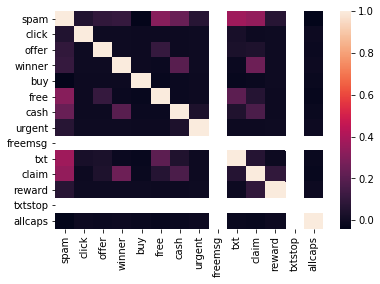

In [5]:
#naive bayes assumes variables are independent of each other
#check how true this is using correlation matrix and heatmap

sns.heatmap(sms_raw.corr())

That is actually a great looking plot for us. Most of the words show strong independence from each other. The only exceptions are free:offer and cash:winner. For now, let's keep everything in the dataset.

In [6]:
#build out training data
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [7]:
#our data is binary/boolean, so use the bernoulli classifier
from sklearn.naive_bayes import BernoulliNB

#instantiate model and store in a new variable
bnb = BernoulliNB()

#fit model to the data
bnb.fit(data, target)

#classify, storing the result in a new variable
y_pred = bnb.predict(data)

#display results
print('Number of mislabeled points out of a total {} points: {}'.format(data.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 5572 points: 459


Now try adding some of your own features and seeing if you can improve the model's performance.

Original: 604

Added keywords: 459